In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Boston Housing dataset (version 1)
boston = fetch_openml(name='boston', version=1, as_frame=True, parser='auto')
df = boston.frame
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


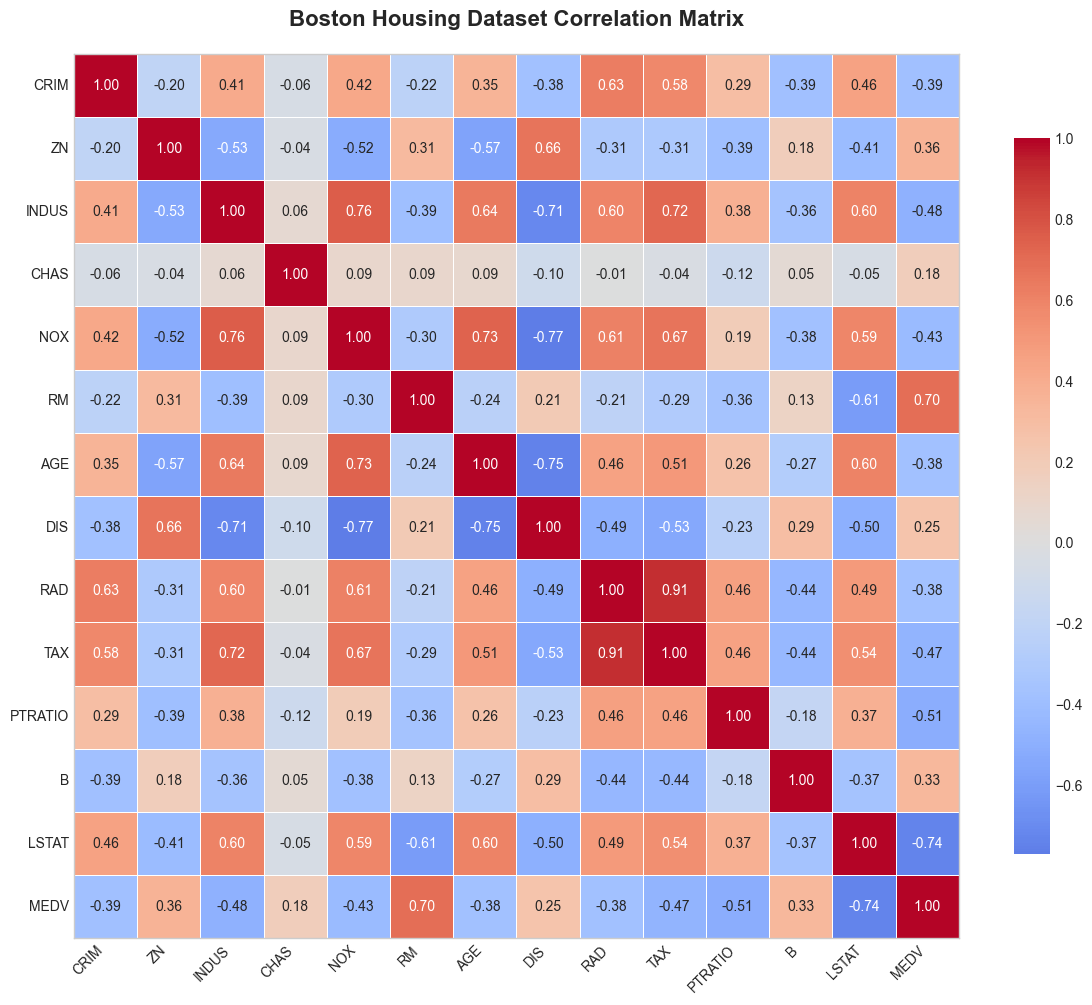


Top 5 Features Correlated with Home Value (MEDV):
RM     0.695
ZN     0.360
B      0.333
DIS    0.250
CHAS   0.175

Top 5 Negative Correlations with Home Value (MEDV):
LSTAT     -0.738
PTRATIO   -0.508
INDUS     -0.484
TAX       -0.469
NOX       -0.427


In [4]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create styled correlation matrix plot
plt.figure(figsize=(12, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# Create heatmap with annotations
heatmap = sns.heatmap(corr_matrix, 
                      annot=True, 
                      fmt=".2f", 
                      cmap='coolwarm',
                      center=0,
                      square=True,
                      linewidths=0.5,
                      annot_kws={"size": 10},
                      cbar_kws={"shrink": 0.8})

# Customize plot appearance
plt.title('Boston Housing Dataset Correlation Matrix', 
          fontsize=16, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add border around heatmap
for _, spine in heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

# Strongest correlations with target (MEDV)
print("\nTop 5 Features Correlated with Home Value (MEDV):")
medv_corr = corr_matrix['MEDV'].sort_values(ascending=False)[1:6]  # Exclude self-correlation
print(medv_corr.to_string(float_format="%.3f"))

# Strongest negative correlations
print("\nTop 5 Negative Correlations with Home Value (MEDV):")
medv_neg_corr = corr_matrix['MEDV'].sort_values()[:5]
print(medv_neg_corr.to_string(float_format="%.3f"))

In [5]:
# Prepare data - using ALL features
X = df.drop('MEDV', axis=1)  # All features except target
y = df['MEDV']  # Median home value in $1000s

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build multivariate linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

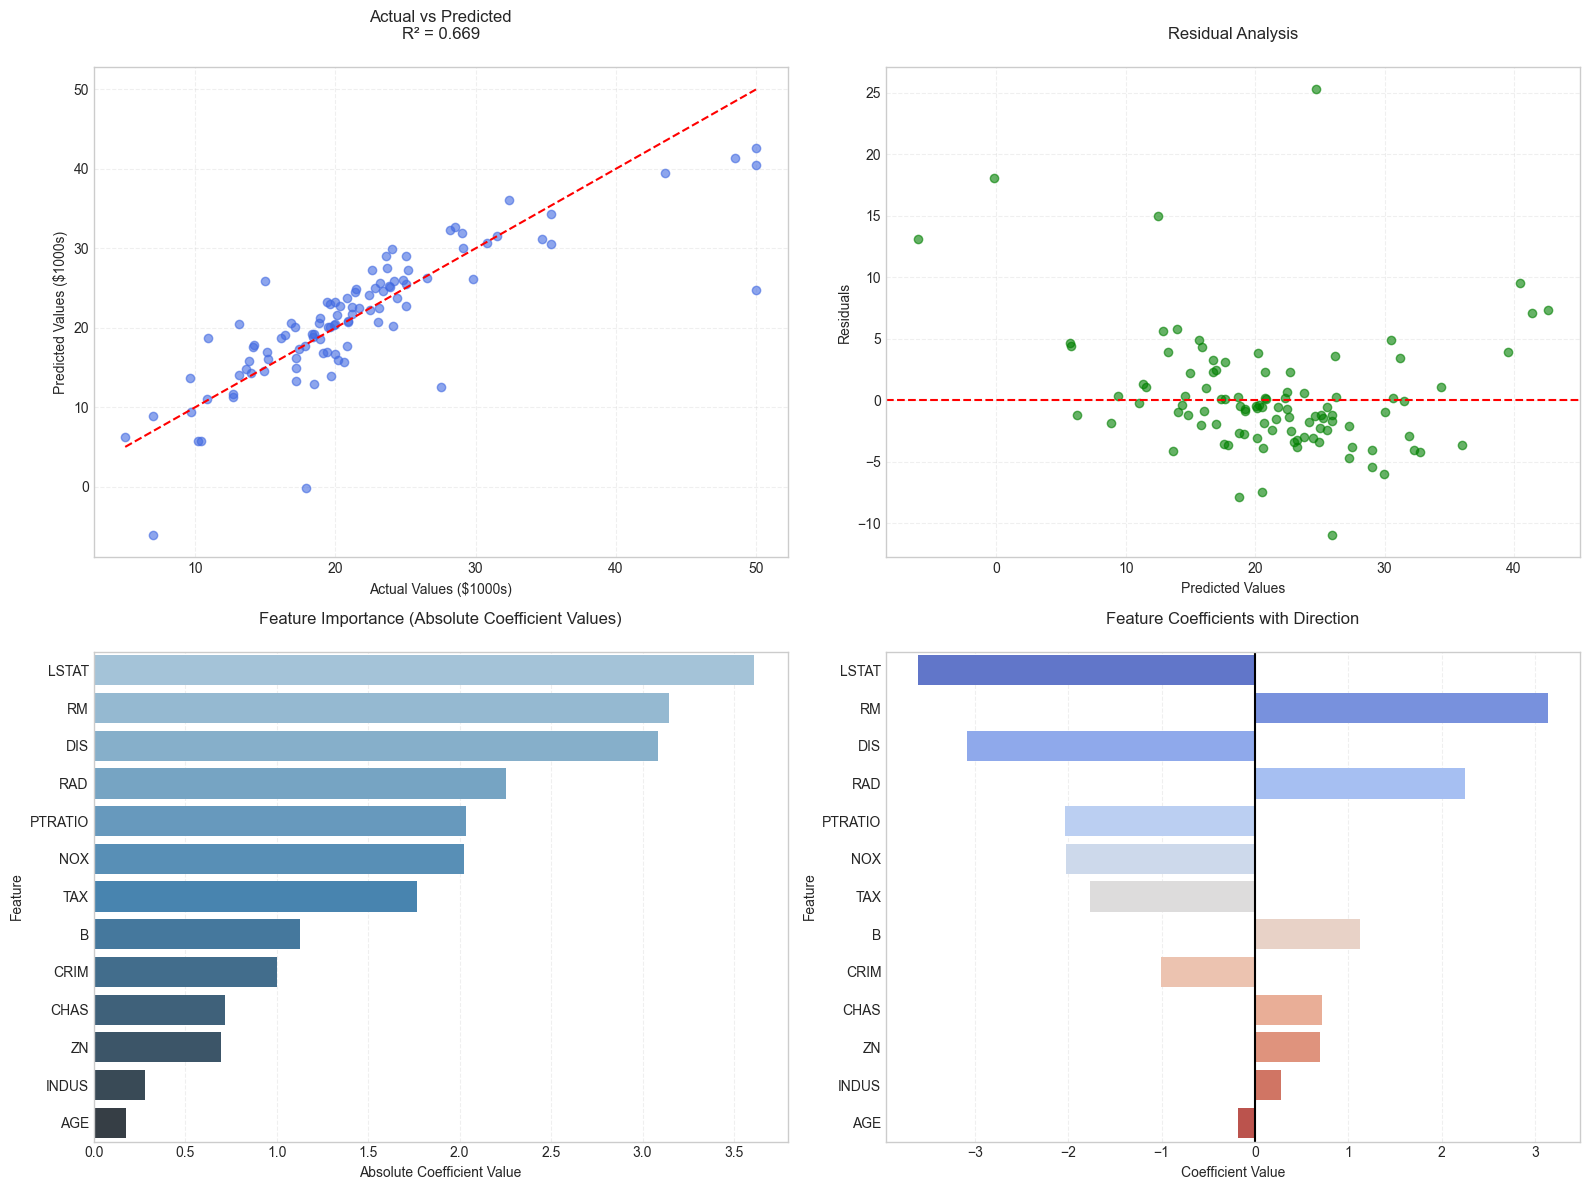


================================ MODEL RESULTS =================================
R-squared:          0.6688
MSE:                24.2911

Feature Impacts:
LSTAT      -3.612 (Each std.dev. reduces price by $3.6K)
RM          3.145 (Each std.dev. increases price by $3.1K)
DIS        -3.082 (Each std.dev. reduces price by $3.1K)
RAD         2.251 (Each std.dev. increases price by $2.3K)
PTRATIO    -2.038 (Each std.dev. reduces price by $2.0K)
NOX        -2.022 (Each std.dev. reduces price by $2.0K)
TAX        -1.767 (Each std.dev. reduces price by $1.8K)
B           1.130 (Each std.dev. increases price by $1.1K)
CRIM       -1.002 (Each std.dev. reduces price by $1.0K)
CHAS        0.719 (Each std.dev. increases price by $0.7K)
ZN          0.696 (Each std.dev. increases price by $0.7K)
INDUS       0.278 (Each std.dev. increases price by $0.3K)
AGE        -0.176 (Each std.dev. reduces price by $0.2K)


In [12]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Absolute_Impact': np.abs(model.coef_)
}).sort_values('Absolute_Impact', ascending=False)

# Visualization
plt.figure(figsize=(16, 12))
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Actual vs Predicted
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values ($1000s)')
plt.ylabel('Predicted Values ($1000s)')
plt.title(f'Actual vs Predicted\nR² = {r2:.3f}', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

# 2. Residuals
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

# 3. Feature Importance (corrected)
plt.subplot(2, 2, 3)
sns.barplot(x='Absolute_Impact', y='Feature', data=feature_importance,
            hue='Feature', palette='Blues_d', dodge=False, legend=False)
plt.title('Feature Importance (Absolute Coefficient Values)', pad=20)
plt.xlabel('Absolute Coefficient Value')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)

# 4. Coefficients (corrected)
plt.subplot(2, 2, 4)
sns.barplot(x='Coefficient', y='Feature', data=feature_importance,
            hue='Feature', palette='coolwarm', dodge=False, legend=False)
plt.axvline(x=0, color='k')
plt.title('Feature Coefficients with Direction', pad=20)
plt.xlabel('Coefficient Value')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Results
print(f"\n{' MODEL RESULTS ':=^80}")
print(f"{'R-squared:':<20}{r2:.4f}")
print(f"{'MSE:':<20}{mse:.4f}\n")

print("Feature Impacts:")
for _, row in feature_importance.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "reduces"
    print(f"{row['Feature']:<10}{row['Coefficient']:>7.3f} (Each std.dev. {direction} price by ${abs(row['Coefficient']):.1f}K)")

In [ ]:
# Finish